# CO2 emissions estimates

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join(path, 'datasets', 'Carbon Dioxide Emission Estimates.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,8,Albania,1975,Emissions (thousand metric tons of carbon diox...,4338.0,NaN,"International Energy Agency, IEA World Energy ..."
1,8,Albania,1985,Emissions (thousand metric tons of carbon diox...,6930.0,NaN,"International Energy Agency, IEA World Energy ..."
2,8,Albania,2005,Emissions (thousand metric tons of carbon diox...,3825.0,NaN,"International Energy Agency, IEA World Energy ..."
3,8,Albania,2010,Emissions (thousand metric tons of carbon diox...,3930.0,NaN,"International Energy Agency, IEA World Energy ..."
4,8,Albania,2015,Emissions (thousand metric tons of carbon diox...,3825.0,NaN,"International Energy Agency, IEA World Energy ..."
...,...,...,...,...,...,...,...
2175,716,Zimbabwe,2010,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."
2176,716,Zimbabwe,2015,Emissions per capita (metric tons of carbon di...,0.9,NaN,"International Energy Agency, IEA World Energy ..."
2177,716,Zimbabwe,2016,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."
2178,716,Zimbabwe,2017,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."


In [5]:
df.shape

(2180, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2180 entries, 0 to 2179
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region/Country/Area  2180 non-null   int64  
 1   Unnamed: 1           2180 non-null   object 
 2   Year                 2180 non-null   int64  
 3   Series               2180 non-null   object 
 4   Value                2180 non-null   float64
 5   Footnotes            220 non-null    object 
 6   Source               2180 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 119.3+ KB


In [7]:
df.rename(                                                                      # rename columns
    columns={
        'Region/Country/Area': 'Code', 
        'Unnamed: 1': 'Region/Country/Area'}, inplace=True)

df.head()    

,Code,Region/Country/Area,Year,Series,Value,Footnotes,Source
0,8,Albania,1975,Emissions (thousand metric tons of carbon diox...,4338.0,NaN,"International Energy Agency, IEA World Energy ..."
1,8,Albania,1985,Emissions (thousand metric tons of carbon diox...,6930.0,NaN,"International Energy Agency, IEA World Energy ..."
2,8,Albania,2005,Emissions (thousand metric tons of carbon diox...,3825.0,NaN,"International Energy Agency, IEA World Energy ..."
3,8,Albania,2010,Emissions (thousand metric tons of carbon diox...,3930.0,NaN,"International Energy Agency, IEA World Energy ..."
4,8,Albania,2015,Emissions (thousand metric tons of carbon diox...,3825.0,NaN,"International Energy Agency, IEA World Energy ..."


In [8]:
df.drop(columns=['Footnotes', 'Source'], inplace=True)                          # drop footnotes and source columns                 

In [9]:
df.head()

,Code,Region/Country/Area,Year,Series,Value
0,8,Albania,1975,Emissions (thousand metric tons of carbon diox...,4338.0
1,8,Albania,1985,Emissions (thousand metric tons of carbon diox...,6930.0
2,8,Albania,2005,Emissions (thousand metric tons of carbon diox...,3825.0
3,8,Albania,2010,Emissions (thousand metric tons of carbon diox...,3930.0
4,8,Albania,2015,Emissions (thousand metric tons of carbon diox...,3825.0


In [10]:
df.describe(include='object')    

,Region/Country/Area,Series
count,2180,2180
unique,144,2
top,Albania,Emissions (thousand metric tons of carbon diox...
freq,16,1090


In [11]:
df['Region/Country/Area'].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Benin', 'Bolivia (Plurin. State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Cambodia', 'Cameroon', 'Canada',
       'Chile', 'China', 'China, Hong Kong SAR', 'Colombia', 'Congo',
       'Costa Rica', 'C�te d�Ivoire', 'Croatia', 'Cuba', 'Cura�ao',
       'Cyprus', 'Czechia', "Dem. People's Rep. Korea",
       'Dem. Rep. of the Congo', 'Denmark', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia',
       'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Guatemala', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Ken

In [12]:
df['Year'].value_counts()

2015    288
2016    288
2017    288
2018    288
2005    286
2010    286
1985    230
1975    226
Name: Year, dtype: int64

In [13]:
df['Series'].value_counts()

Emissions (thousand metric tons of carbon dioxide)      1090
Emissions per capita (metric tons of carbon dioxide)    1090
Name: Series, dtype: int64

In [14]:
df['Code'].value_counts().head()

8      16
504    16
604    16
600    16
591    16
Name: Code, dtype: int64

# Data Cleaning

In [15]:
df['Region/Country/Area'].replace(
    {'C�te d�Ivoire': "Côte d'Ivoire", 
    'Cura�ao': 'Curaçao',
    'R�union': 'Réunion',
    'Saint Barth�lemy': 'Saint Barthélemy'}, inplace=True
)

df['Region/Country/Area'].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Benin', 'Bolivia (Plurin. State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Cambodia', 'Cameroon', 'Canada',
       'Chile', 'China', 'China, Hong Kong SAR', 'Colombia', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao',
       'Cyprus', 'Czechia', "Dem. People's Rep. Korea",
       'Dem. Rep. of the Congo', 'Denmark', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia',
       'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Guatemala', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Ken

In [16]:
df['Value'].describe()

count    2.180000e+03
mean     9.471157e+04
std      5.600929e+05
min      0.000000e+00
25%      3.300000e+00
50%      5.065000e+01
75%      2.322500e+04
max      9.528214e+06
Name: Value, dtype: float64

<AxesSubplot:xlabel='Value', ylabel='Density'>

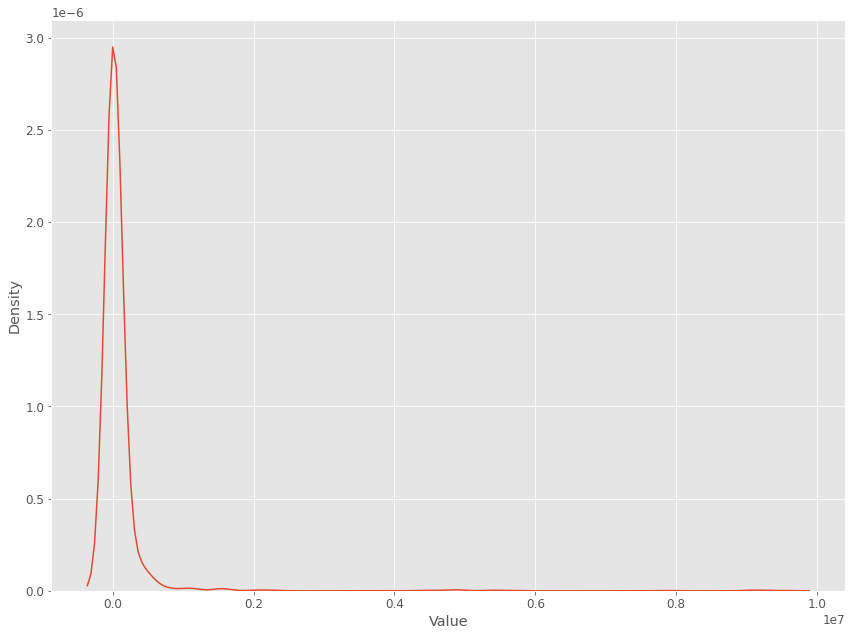

In [17]:
sns.kdeplot(data=df, x='Value')

# Missing Values Exploration

In [18]:
df.isna().sum()

Code                   0
Region/Country/Area    0
Year                   0
Series                 0
Value                  0
dtype: int64

# Grouping and Aggregation

In [19]:
df_grpd = df.groupby('Region/Country/Area')
df_grpd.head()

,Code,Region/Country/Area,Year,Series,Value
0,8,Albania,1975,Emissions (thousand metric tons of carbon diox...,4338.0
1,8,Albania,1985,Emissions (thousand metric tons of carbon diox...,6930.0
2,8,Albania,2005,Emissions (thousand metric tons of carbon diox...,3825.0
3,8,Albania,2010,Emissions (thousand metric tons of carbon diox...,3930.0
4,8,Albania,2015,Emissions (thousand metric tons of carbon diox...,3825.0
...,...,...,...,...,...
2164,716,Zimbabwe,1975,Emissions (thousand metric tons of carbon diox...,7169.0
2165,716,Zimbabwe,1985,Emissions (thousand metric tons of carbon diox...,9730.0
2166,716,Zimbabwe,2005,Emissions (thousand metric tons of carbon diox...,10275.0
2167,716,Zimbabwe,2010,Emissions (thousand metric tons of carbon diox...,9504.0


# Data Visualization

In [20]:
from matplotlib.ticker import FuncFormatter

# y-axis formatter functions
def billion(x, pos):
    return '%1.2fB' % (x * 1e-9)

format_bill = FuncFormatter(billion)


def million(x, pos):
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)


def thousand(x, pos):
    return '%1.0fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


# bar plot helper function
def plot_bar(data, x, y, ci=None, hue=None, color=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar charts
    sns.barplot(
        data=data,
        x=x, y=y, 
        ci=ci, hue=hue, color=color,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    # despine plot axes
    sns.despine(bottom=True, left=True)

    return plot_bar


# line chart helper function
def plot_line(data, x, y, hue=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot line chart
    sns.lineplot(
        data=data, 
        x=x, y=y, 
        hue=hue, size=size, style=style,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    # despine axes
    sns.despine(bottom=True, left=True)

    return plot_line

# Ghana Exploration

<function __main__.plot_bar(data, x, y, ci=None, hue=None, color=None, title=None, xlabel=None, ylabel=None, formatter=None)>

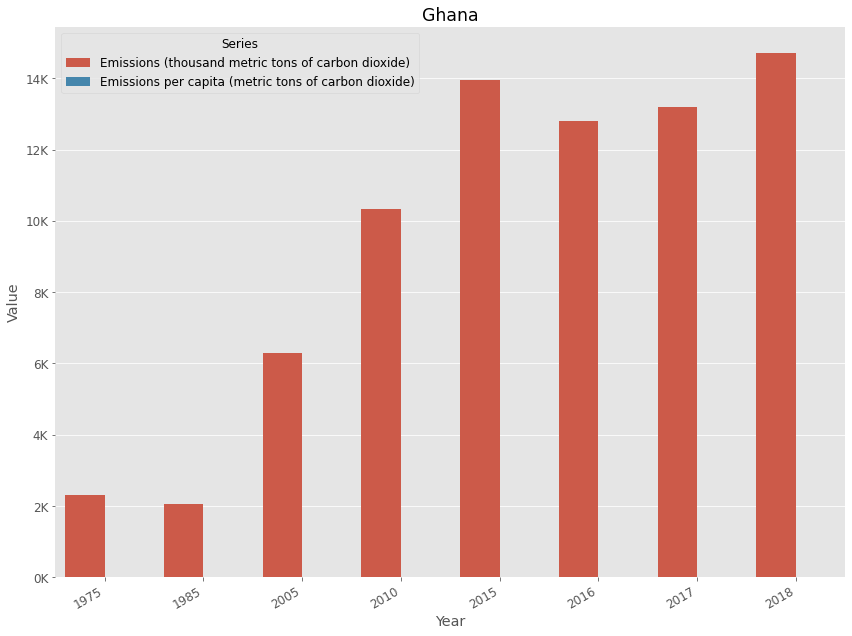

In [21]:
plot_bar(
    data=df_grpd.get_group('Ghana'),
    x='Year', y='Value', hue='Series',
    title='Ghana', xlabel='Year', ylabel='Value',
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

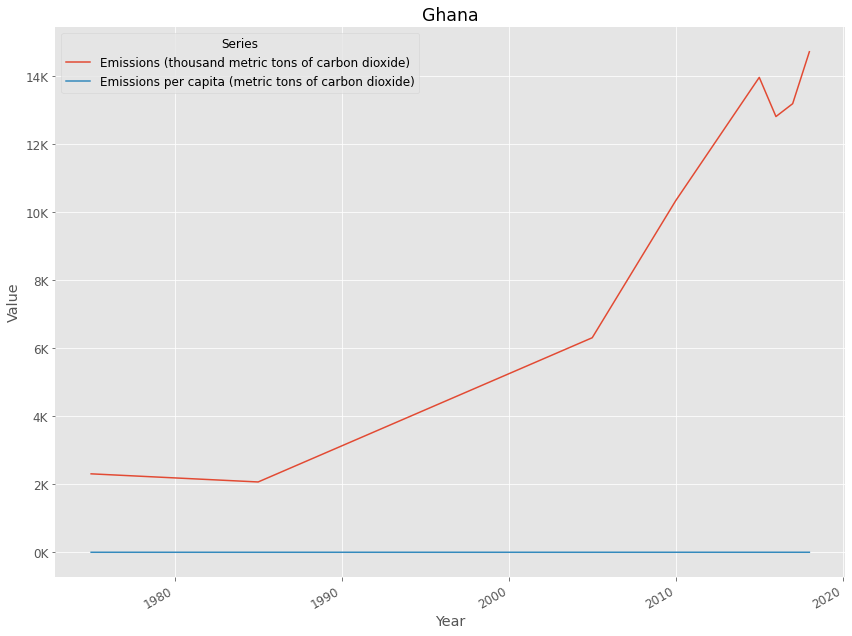

In [22]:
plot_line(
    data=df_grpd.get_group('Ghana'),
    x='Year', y='Value', hue='Series',
    title='Ghana', xlabel='Year', ylabel='Value',
    formatter=format_tsd
)

# Germany Exploration

<function __main__.plot_bar(data, x, y, ci=None, hue=None, color=None, title=None, xlabel=None, ylabel=None, formatter=None)>

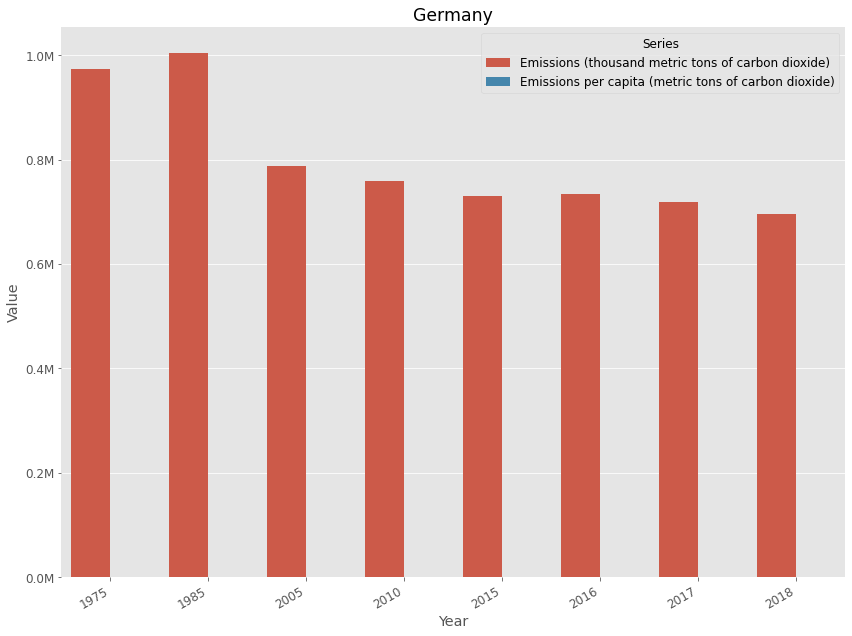

In [23]:
plot_bar(
    data=df_grpd.get_group('Germany'),
    x='Year', y='Value', hue='Series',
    title='Germany', xlabel='Year', ylabel='Value',
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

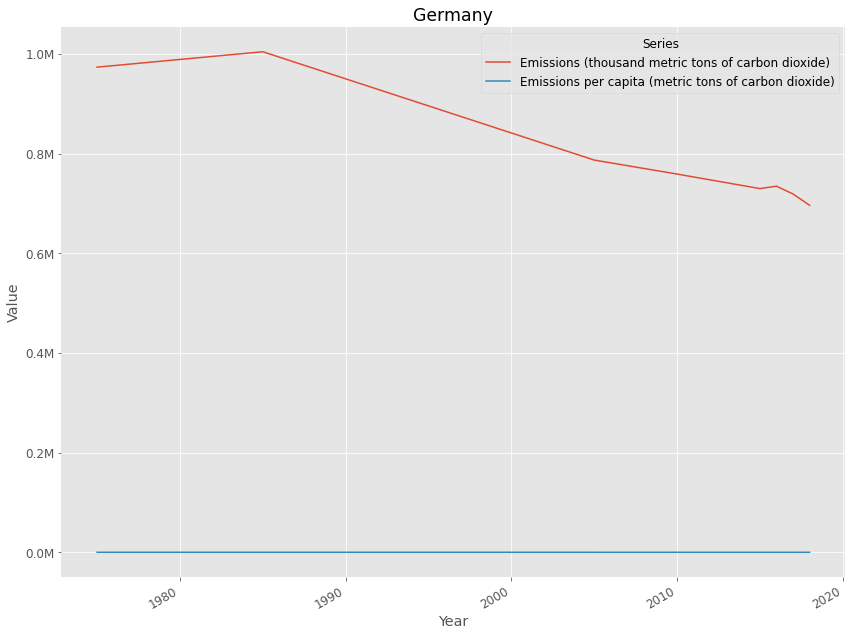

In [24]:
plot_line(
    data=df_grpd.get_group('Germany'),
    x='Year', y='Value', hue='Series',
    title='Germany', xlabel='Year', ylabel='Value',
    formatter=format_mill
)